<a href="https://colab.research.google.com/github/sharvitKashikar/Machine-Learning-LAB/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2]
])
df = pd.DataFrame(data, columns=["X", "Y", "Z"])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,1.0,1.1,0.4
7,1.5,1.6,0.8
8,1.1,0.9,0.2


In [ ]:
standardized_data = (df - df.mean())
/ df.std()

,0
X,0.829826
Y,0.890381
Z,0.554777


In [ ]:
cov_matrix = np.cov(standardized_data.T)

In [ ]:
eig_vals , eig_vecs = np.linalg.eig(cov_matrix)
eig_vals

array([1.74050773, 0.04262052, 0.00603841])

In [ ]:
#Step 5: Sort eigenvalues and eigen vectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

In [ ]:
#Step 6: Select top 2 eigenvectors
eig_vecs_subset = eig_vecs[:, :2]

In [ ]:
#Step 7: Project data to new basis
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])

In [ ]:
#Step 8: Output the reduced data
print("\nReduced Data (after PCA):\n", reduced_df)



Reduced Data (after PCA):
         PC1       PC2
0  0.844769  0.241073
1 -1.899416 -0.147924
2  1.077175 -0.323190
3  0.299404 -0.093591
4  1.823593  0.237495
5  1.046499 -0.170020
6 -1.281918  0.002018
7 -0.473141  0.004294
8 -1.436965  0.249845


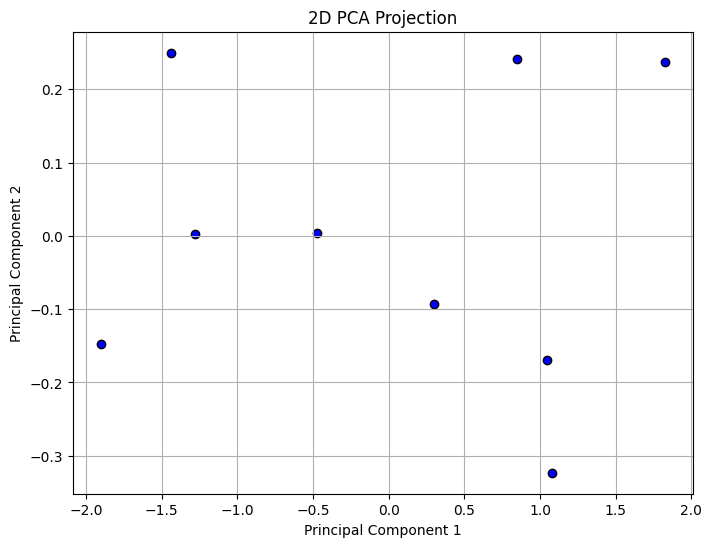

In [ ]:
#Step 9: Visualize
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PC1'],
reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()